In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Breast Cancer Wisconsin.csv", sep=",")

In [922]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [923]:
df.shape

(569, 33)

In [924]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [925]:
df["diagnosis"].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [926]:
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [927]:
df.drop("Unnamed: 32",axis=1,inplace=True)

In [928]:
df.dropna(inplace=True)

In [929]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [930]:
process_data = df.drop(["id","diagnosis"],axis=1)

### box plot

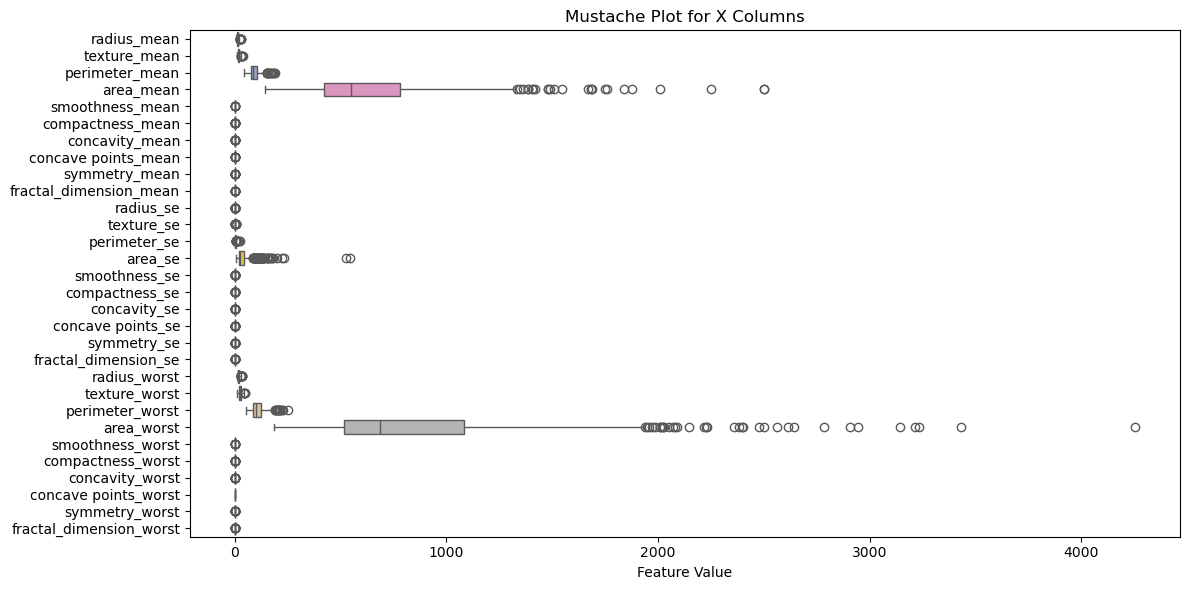

In [931]:
# Create a box plot (Mustache plot) for each column in X
plt.figure(figsize=(12, 6))
sns.boxplot(data=process_data, orient='h', palette='Set2')

# Add labels and title
plt.xlabel('Feature Value')
plt.title('Mustache Plot for X Columns')
plt.tight_layout()

# Show the plot
plt.show()


In [932]:
outliers_list = ["perimeter_mean","area_mean","area_se","perimeter_worst","area_worst"]

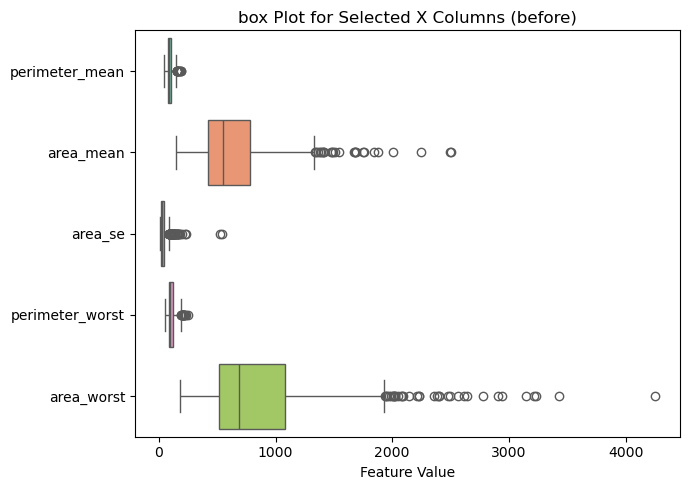

In [933]:
# Ensure correct column names (assuming 'perimetre_xorst' is a typo and should be 'perimeter_worst')
plt.figure(figsize=(7, 5))
sns.boxplot(data=process_data[outliers_list], orient='h', palette='Set2')

# Add labels and title
plt.xlabel('Feature Value')
plt.title('box Plot for Selected X Columns (before)')
plt.tight_layout()

# Show the plot
plt.show()

In [934]:
# Function to identify outliers using IQR
def handle_outliers(df):
    for column in df.columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        median_value = df[column].mean()
        
        # Replace outliers with the median value
        df[column] = np.where((df[column] < lower_bound) | (df[column] > upper_bound), median_value, df[column])
    
    return df

In [935]:
# handle outliers with the median
process_data = handle_outliers(process_data)

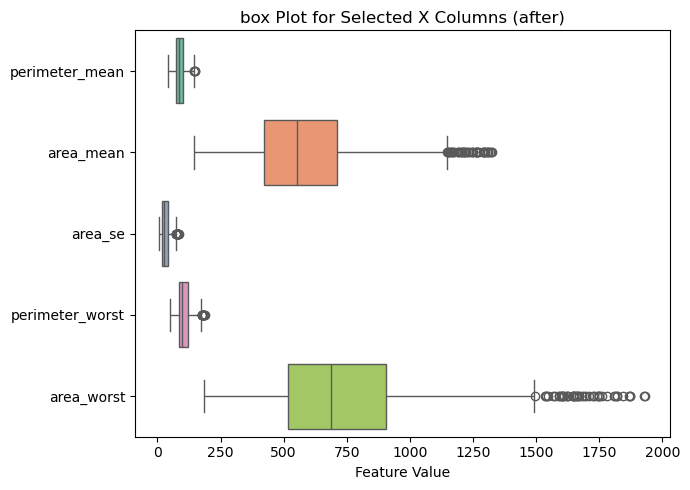

In [936]:
# Ensure correct column names (assuming 'perimetre_xorst' is a typo and should be 'perimeter_worst')
plt.figure(figsize=(7, 5))
sns.boxplot(data=process_data[outliers_list], orient='h', palette='Set2')

# Add labels and title
plt.xlabel('Feature Value')
plt.title('box Plot for Selected X Columns (after)')
plt.tight_layout()

# Show the plot
plt.show()

In [937]:
# Assuming X is your features DataFrame
corr_matrix = process_data.corr()

In [938]:
# Assume process_data is your DataFrame
corr_matrix = process_data.corr()

# Step 1: Flatten the upper triangle of the correlation matrix (excluding self-correlations)
corr_values = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)).stack()

# Step 2: Define intervals and count occurrences
intervals = pd.cut(corr_values,
                   bins=[-1, -0.8, -0.5, -0.2, 0, 0.2, 0.5, 0.8, 1],
                   labels=["(-1, -0.8]", "(-0.8, -0.5]", "(-0.5, -0.2]", "(-0.2, 0]",
                           "(0, 0.2]", "(0.2, 0.5]", "(0.5, 0.8]", "(0.8, 1]"])

interval_counts = intervals.value_counts().sort_index()

print(interval_counts)

(-1, -0.8]        0
(-0.8, -0.5]      0
(-0.5, -0.2]     11
(-0.2, 0]        35
(0, 0.2]         84
(0.2, 0.5]      176
(0.5, 0.8]      102
(0.8, 1]         27
Name: count, dtype: int64


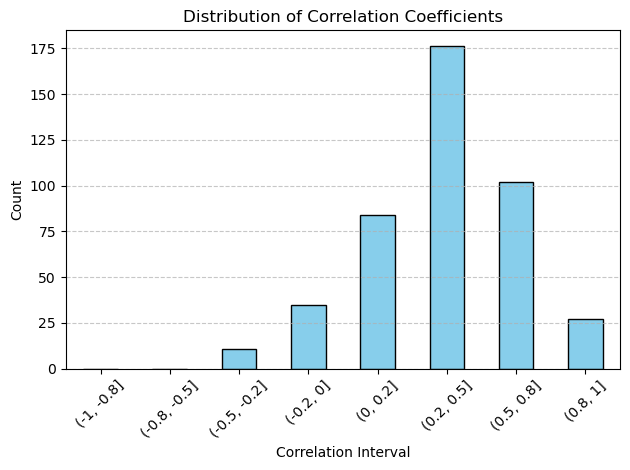

In [939]:
interval_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Correlation Coefficients')
plt.xlabel('Correlation Interval')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### correlation

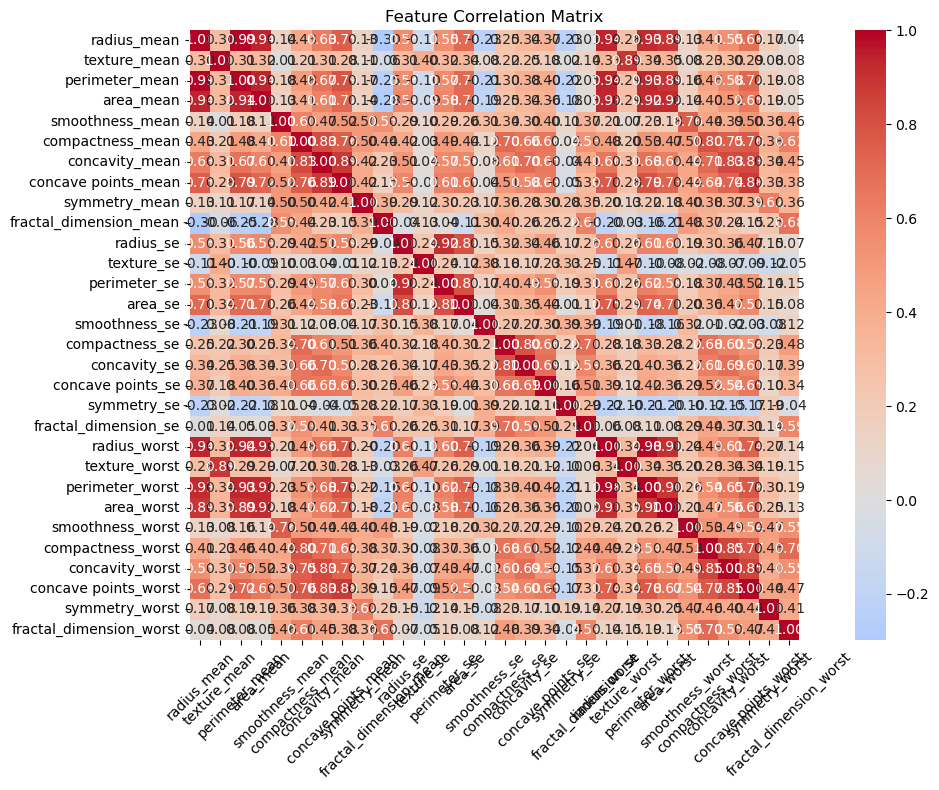

In [940]:
corr_matrix = process_data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Draw the heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0, square=True)

# Titles and labels
plt.title("Feature Correlation Matrix")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [941]:
# Compute correlation matrix
corr_matrix = process_data.corr()
# corr_matrix = corr_matrix.abs()

# Set the threshold
threshold = 0.2

# Mask to ignore lower triangle and diagonal
mask = np.triu(np.ones_like(corr_matrix, dtype=bool), k=1)
high_corr_pairs = (corr_matrix > threshold) & mask

# Get column names involved in high correlation
cols_1 = set(corr_matrix.columns[high_corr_pairs.any(axis=0)])
cols_2 = set(corr_matrix.columns[high_corr_pairs.any(axis=1)])
high_corr_cols = cols_1 | cols_2

# Subset the original DataFrame
high_corr_data = process_data[list(high_corr_cols)]

print("Columns with high correlation:")
print(high_corr_data.columns.tolist())

Columns with high correlation:
['fractal_dimension_se', 'compactness_mean', 'concave points_worst', 'compactness_se', 'symmetry_worst', 'smoothness_worst', 'area_worst', 'fractal_dimension_mean', 'radius_mean', 'symmetry_se', 'symmetry_mean', 'area_se', 'radius_se', 'concave points_se', 'texture_worst', 'texture_se', 'perimeter_se', 'area_mean', 'concave points_mean', 'perimeter_mean', 'texture_mean', 'radius_worst', 'smoothness_se', 'perimeter_worst', 'concavity_mean', 'concavity_worst', 'smoothness_mean', 'compactness_worst', 'concavity_se', 'fractal_dimension_worst']


In [942]:
high_corr_data

,fractal_dimension_se,compactness_mean,concave points_worst,compactness_se,symmetry_worst,smoothness_worst,area_worst,fractal_dimension_mean,radius_mean,symmetry_se,...,texture_mean,radius_worst,smoothness_se,perimeter_worst,concavity_mean,concavity_worst,smoothness_mean,compactness_worst,concavity_se,fractal_dimension_worst
0,0.006193,0.104341,0.2654,0.049040,0.290076,0.162200,880.583128,0.078710,17.99,0.030030,...,10.38,25.380,0.006399,184.60,0.088799,0.711900,0.11840,0.254265,0.05373,0.118900
1,0.003532,0.078640,0.1860,0.013080,0.275000,0.123800,880.583128,0.056670,20.57,0.013890,...,17.77,24.990,0.005225,158.80,0.086900,0.241600,0.08474,0.186600,0.01860,0.089020
2,0.004571,0.159900,0.2430,0.040060,0.361300,0.144400,1709.000000,0.059990,19.69,0.022500,...,21.25,23.570,0.006150,152.50,0.197400,0.450400,0.10960,0.424500,0.03832,0.087580
3,0.003795,0.104341,0.2575,0.025478,0.290076,0.132369,567.700000,0.062798,11.42,0.020542,...,20.38,14.910,0.009110,98.87,0.241400,0.686900,0.09636,0.254265,0.05661,0.083946
4,0.005115,0.132800,0.1625,0.024610,0.236400,0.137400,1575.000000,0.058830,20.29,0.017560,...,14.34,22.540,0.011490,152.20,0.198000,0.400000,0.10030,0.205000,0.05688,0.076780
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.004239,0.115900,0.2216,0.028910,0.206000,0.141000,880.583128,0.056230,21.56,0.011140,...,22.39,25.450,0.010300,166.10,0.243900,0.410700,0.11100,0.211300,0.05198,0.071150
565,0.002498,0.103400,0.1628,0.024230,0.257200,0.116600,1731.000000,0.055330,20.13,0.018980,...,28.25,23.690,0.005769,155.00,0.144000,0.321500,0.09780,0.192200,0.03950,0.066370
566,0.003892,0.102300,0.1418,0.037310,0.221800,0.113900,1124.000000,0.056480,16.60,0.013180,...,28.08,18.980,0.005903,126.70,0.092510,0.340300,0.08455,0.309400,0.04730,0.078200
567,0.006185,0.104341,0.2650,0.025478,0.408700,0.165000,1821.000000,0.070160,20.60,0.023240,...,29.33,25.740,0.006522,184.60,0.088799,0.272188,0.11780,0.254265,0.07117,0.083946


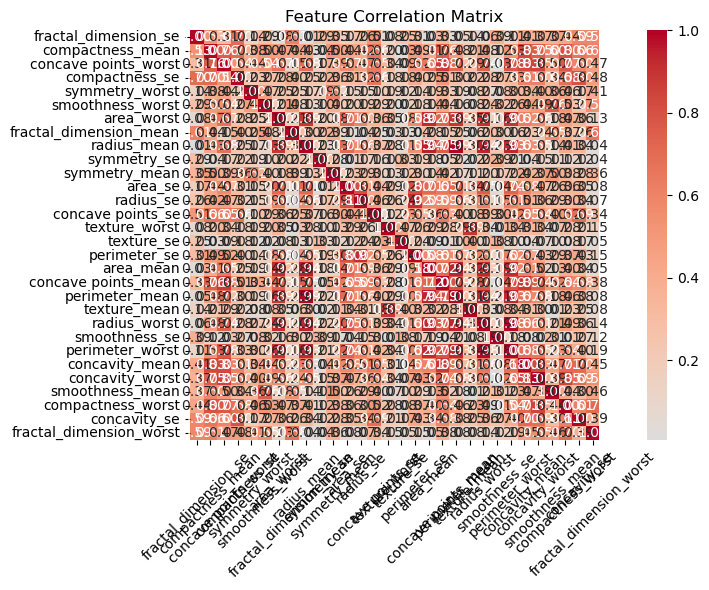

In [943]:
corr_matrix = high_corr_data.corr().abs()

# Set up the matplotlib figure
plt.figure(figsize=(10,6))

# Draw the heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0, square=True)

# Titles and labels
plt.title("Feature Correlation Matrix")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

### before fit model

In [944]:
X = high_corr_data.copy()
Y = df["diagnosis"]

In [945]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [946]:
le = LabelEncoder()
Y = le.fit_transform(Y)
Y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [947]:
# X = X[high_corr_columns]

In [948]:
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])
X

,fractal_dimension_se,compactness_mean,concave points_worst,compactness_se,symmetry_worst,smoothness_worst,area_worst,fractal_dimension_mean,radius_mean,symmetry_se,...,texture_mean,radius_worst,smoothness_se,perimeter_worst,concavity_mean,concavity_worst,smoothness_mean,compactness_worst,concavity_se,fractal_dimension_worst
0,1.913579,0.103683,2.296076,2.124077,0.164786,1.428884,0.247840,2.831358,1.329983,1.937606,...,-2.184967,2.305018,-0.091751,2.754437,0.123167,2.492469,1.707652,0.116539,1.450595,2.726086
1,0.101341,-0.473860,1.087084,-0.785480,-0.158813,-0.370451,0.247840,-0.944631,2.163175,-0.981102,...,-0.337487,2.210693,-0.680372,1.866193,0.093879,-0.089646,-0.859010,-0.414053,-0.536273,0.536737
2,0.808938,1.352186,1.955000,1.397497,1.693626,0.594817,2.394137,-0.375834,1.878986,0.575904,...,0.532504,1.867255,-0.216595,1.649296,1.797814,1.056740,1.036629,1.451428,0.579043,0.431226
3,0.280388,0.103683,2.175786,0.217665,0.164786,0.031054,-0.562791,0.105178,-0.791749,0.221879,...,0.315007,-0.227234,1.267491,-0.197082,2.476304,2.355210,0.027066,0.116539,1.613481,0.164944
4,1.179422,0.743204,0.729259,0.147423,-0.987366,0.266814,2.046964,-0.574570,2.072751,-0.317431,...,-1.194978,1.618142,2.460776,1.638967,1.807066,0.780026,0.327480,-0.269770,1.628751,-0.360105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.582834,0.363433,1.629151,0.495340,-1.639906,0.435501,0.247840,-1.020013,2.482888,-1.478404,...,0.817501,2.321948,1.864133,2.117517,2.514854,0.838773,1.143382,-0.220369,1.351619,-0.772623
565,-0.602851,0.082538,0.733827,0.116677,-0.540892,-0.707826,2.451136,-1.174205,2.021080,-0.060642,...,2.282486,1.896278,-0.407621,1.735366,0.974374,0.349033,0.136848,-0.370140,0.645781,-1.122860
566,0.346514,0.057819,0.414069,1.174992,-1.300757,-0.834342,0.878495,-0.977182,0.881093,-1.109497,...,2.239986,0.757128,-0.340436,0.761051,0.180387,0.452252,-0.873498,0.548877,1.086930,-0.256060
567,1.908131,0.103683,2.289985,0.217665,2.711072,1.560085,2.684312,1.366535,2.172863,0.709723,...,2.552483,2.392087,-0.030081,2.754437,0.123167,0.078295,1.661900,0.116539,2.436959,0.164944


### model part

In [949]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import (
    mean_absolute_error, mean_squared_error, r2_score,
    accuracy_score, classification_report, confusion_matrix,
    precision_score, recall_score, f1_score
)
from sklearn.model_selection import train_test_split

In [950]:
class ModelEvaluator:
    def __init__(self, models, test_size=0.22, random_state=42, classification_threshold=0.5):
        """
        models: dict of name → estimator
        test_size: fraction for hold-out
        classification_threshold: for binarizing continuous predictions
        """
        self.models = models
        self.test_size = test_size
        self.random_state = random_state
        self.threshold = classification_threshold
        self.results = []

    def split(self, X, y):
        return train_test_split(
            X, y,
            test_size=self.test_size,
            random_state=self.random_state
        )

    def evaluate(self, X, y, do_classification=False):
        X_train, X_test, y_train, y_test = self.split(X, y)
        for name, model in self.models.items():
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)

            # regression metrics
            mae = mean_absolute_error(y_test, y_pred)
            mse = mean_squared_error(y_test, y_pred)
            rmse = np.sqrt(mse)
            r2 = r2_score(y_test, y_pred)

            row = {
                "Model": name,
                "MAE": mae,
                "MSE": mse,
                "RMSE": rmse,
                "R²": r2,
            }

            if do_classification:
                # binarize continuous preds
                y_pred_cls = (y_pred > self.threshold).astype(int)
                row.update({
                    "Accuracy": accuracy_score(y_test, y_pred_cls),
                    # store the _string_ report directly
                    "Class Report": classification_report(y_test, y_pred_cls),
                    "Conf Matrix": confusion_matrix(y_test, y_pred_cls)
                })

            self.results.append(row)

        return pd.DataFrame(self.results)

    def print_reports(self, df):
        """Prints each model’s full text report and confusion matrix."""
        for _, row in df.iterrows():
            print(f"\n=== {row['Model']} ===")
            print(f"MAE: {row['MAE']:.4f}   MSE: {row['MSE']:.4f}   RMSE: {row['RMSE']:.4f}   R²: {row['R²']:.4f}")
            if "Accuracy" in row:
                print(f"Accuracy: {row['Accuracy']:.4f}")
                print("Classification Report:")
                print(row["Class Report"])
                print("Confusion Matrix:")
                print(pd.DataFrame(
                    row["Conf Matrix"],
                    index=["True 0","True 1"],
                    columns=["Pred 0","Pred 1"]
                ))

In [951]:
models = {
    "Linear Reg": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "KNN": KNeighborsRegressor(n_neighbors=5)
}

evaluator = ModelEvaluator(models, test_size=0.22, random_state=42, classification_threshold=0.5)
results_df = evaluator.evaluate(X, Y, do_classification=True)

# show the summary table
print(results_df[["Model","MAE","MSE","RMSE","R²","Accuracy"]])

# and the detailed reports + confusion matrices
evaluator.print_reports(results_df)


           Model       MAE       MSE      RMSE        R²  Accuracy
0     Linear Reg  0.180340  0.051355  0.226617  0.780416  0.984127
1  Decision Tree  0.079365  0.079365  0.281718  0.660652  0.920635
2            KNN  0.058730  0.028889  0.169967  0.876477  0.968254

=== Linear Reg ===
MAE: 0.1803   MSE: 0.0514   RMSE: 0.2266   R²: 0.7804
Accuracy: 0.9841
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        79
           1       1.00      0.96      0.98        47

    accuracy                           0.98       126
   macro avg       0.99      0.98      0.98       126
weighted avg       0.98      0.98      0.98       126

Confusion Matrix:
        Pred 0  Pred 1
True 0      79       0
True 1       2      45

=== Decision Tree ===
MAE: 0.0794   MSE: 0.0794   RMSE: 0.2817   R²: 0.6607
Accuracy: 0.9206
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.9

### regression log

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.22, random_state=42)

In [ ]:
# Initialize and train the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
# Predic
y_pred_reg = model.predict(X_test)

In [ ]:
# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred_reg))
print("\nClassification Report:\n", classification_report(y_test, y_pred_reg))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_reg))

Accuracy: 0.9761904761904762

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98        79
           1       0.96      0.98      0.97        47

    accuracy                           0.98       126
   macro avg       0.97      0.98      0.97       126
weighted avg       0.98      0.98      0.98       126

Confusion Matrix:
 [[77  2]
 [ 1 46]]


### descision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Initialize and train the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
# Predict
y_pred_dt = dt_model.predict(X_test)

In [ ]:
# Evaluate
print("Decision Tree - Accuracy:", accuracy_score(y_test, y_pred_dt))
print("\nDecision Tree - Classification Report:\n", classification_report(y_test, y_pred_dt))
print("Decision Tree - Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))

Decision Tree - Accuracy: 0.9206349206349206

Decision Tree - Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.91      0.94        79
           1       0.86      0.94      0.90        47

    accuracy                           0.92       126
   macro avg       0.91      0.92      0.92       126
weighted avg       0.92      0.92      0.92       126

Decision Tree - Confusion Matrix:
 [[72  7]
 [ 3 44]]


### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Initialize and train the KNN model (you can experiment with the number of neighbors, k)
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
# Predict
y_pred_knn = knn_model.predict(X_test)

In [ ]:
# Evaluate
print("KNN - Accuracy:", accuracy_score(y_test, y_pred_knn))
print("\nKNN - Classification Report:\n", classification_report(y_test, y_pred_knn))
print("KNN - Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))

KNN - Accuracy: 0.9682539682539683

KNN - Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97        79
           1       0.96      0.96      0.96        47

    accuracy                           0.97       126
   macro avg       0.97      0.97      0.97       126
weighted avg       0.97      0.97      0.97       126

KNN - Confusion Matrix:
 [[77  2]
 [ 2 45]]
